In [6]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v2

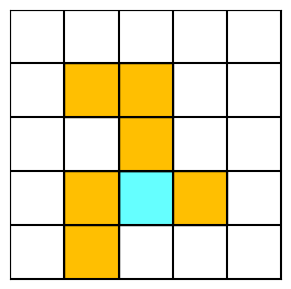

In [7]:
gamma = 0.9   #折扣因子，越接近0越近视

rows = 5      #记得行数和列数这里要同步改
columns = 5

# gridworld = GridWorld_v2.GridWorld_v2(rows=rows, columns=columns, forbiddenAreaNums=8, targetNums=2, seed = 52,forbiddenAreaScore=-10)
# gridworld = GridWorld_v2.GridWorld_v2(desc = [".#",".T"])             #赵老师4-1的例子
# gridworld = GridWorld_v2.GridWorld_v2(desc = ["##.T","...#","...."])  #随便弄的例子
gridworld = GridWorld_v2.GridWorld_v2(forbidden_area_score=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
#gridworld = GridWorld_v2(forbiddenAreaScore=-10, score=1,desc = ["T."]) 
gridworld.show()

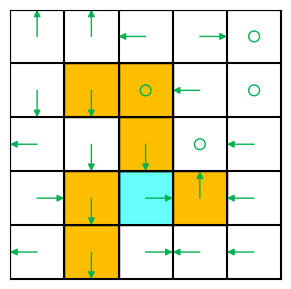

In [8]:
value = np.zeros(rows*columns).reshape(rows,columns)       #初始化可以任意，也可以全0
qtable = np.zeros((rows*columns,5)).reshape(rows,columns,5)  #初始化，这里主要是初始化维数，里面的内容会被覆盖所以无所谓
np.random.seed(50)
policy = np.eye(5)[np.random.randint(0,5,size=(rows*columns))].reshape(rows,columns,5) # TODO policy有一些不同,需要重新考虑绘图方法 
gridworld.show_policy(policy.argmax(axis=2))

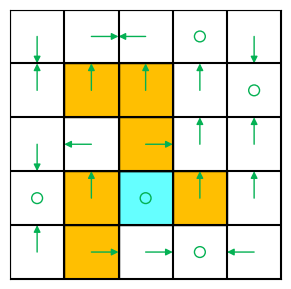

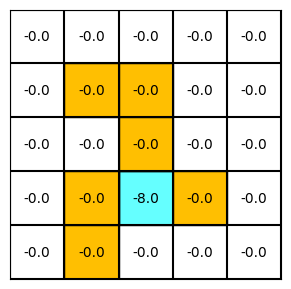

In [9]:
#通过采样的方法计算action value，model free的话意味着不知道整个gridworld的概率了，所以不能直接套贝尔曼方程迭代求解
policy = np.eye(5)[np.random.randint(0,5,size=(rows*columns))].reshape(rows,columns,5) 
qtable = np.zeros((rows*columns,5)).reshape(rows,columns,5)  #生成Qtable，也就是action-value-table
# gridworld.show()
# gridworld.show_policy(policy)
# print("random policy")

trajectorySteps = 20000

epsilon = 0.1 #0.2


num_episodes = 200

values = np.ones(rows*columns).reshape(rows,columns)       #初始化可以任意，也可以全0
for episode in range(num_episodes):
    # 
    if(epsilon > 0.001) :
        epsilon -= 0.001
    else:
        epsilon = 0.001
        
    p1 = 1-epsilon * (4/5)
    p0 = epsilon/5
    # trajectorySteps = int(20+epsilon*1000)
    print("trajectorySteps",trajectorySteps)
    print(f"epision:{epsilon}, p1:{p1}, p0:{p0}")
    
    d = {1:p1, 0:p0}
    policy_epsilon = np.vectorize(d.get)(policy)
    

    cnt = np.zeros(25).reshape(rows,columns)
    qtable_rewards = np.zeros((rows,columns,5))
    qtable_nums = np.zeros((rows,columns,5))
    i = random.randint(0,24)  #初始状态
    j = random.randint(0,4)
    # 不是正方形会有bug
    Trajectory = gridworld.get_trajectory_score(now_state=(i//rows,i%rows), action=j, policy=policy_epsilon, steps=trajectorySteps)
    # 注意这里的返回值是大小为(trajectorySteps+1)的元组列表，因为把第一个动作也加入进去了
    score = 0
    # for k in range(trajectorySteps,-1,-1):
    for k in reversed(Trajectory):
        tmpstate, tmpaction, tmpscore, _, __  = k
        # cnt[tmpstate] += 1
        score = score*gamma + tmpscore  #细节从后往前优化算法
        
        qtable_rewards[tmpstate][tmpaction] += score
        qtable_nums[tmpstate][tmpaction] += 1
        qtable[tmpstate][tmpaction] = qtable_rewards[tmpstate][tmpaction] / qtable_nums[tmpstate][tmpaction]

    values = (qtable*policy_epsilon).sum(axis=2)
    
    
    policy = np.eye(5)[np.argmax(qtable,axis=2).flatten()].reshape(rows,columns,5)  #qtable的最优值作为更新策略，并用独热码来表示
    gridworld.show_policy(policy.argmax(axis=2),step=False)

    gridworld.show_value(values)
    policy_epsilon = np.vectorize(d.get)(policy)
        
    # print(np.array(cnt).reshape(5,5))


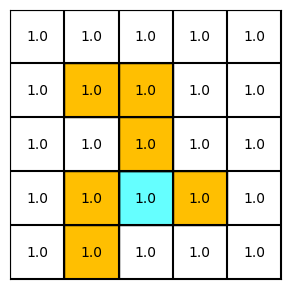

In [10]:
values = np.ones(rows*columns).reshape(rows,columns)       #初始化可以任意，也可以全0
gridworld.show_value(values)